|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 10-5

> Voici un problème qui devient très complexe à traiter __à la main__ et ou l'utilisation de calculateur formel de type **sympy, mathematica/wolfram, maple, mupad, maxima, mathcad ** ou tout autre calculateur symbolique devient très utile. Ainsi dans le document qui suit, seulement la pose du problème est nécessaire, tout le travail mathématique est fait par **sympy**.  

>Le réacteur catalytique a 3 sections, seule la section du milieu a une source thermique


><img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-5-1.png'>


>les équations de bilans donnent:
<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-5-2.png'>

>Dans le livre de Transport Phenomena, Bird utilise un artifice afin de solutionner plus facilement, il considère que la conduction axiale est négligeable (c'est le terme contenant la conductivité thermique). Dans ce qui suit, nous ne ferons pas cette hypothèse, ** SYMPY ** nous aide à solutionner et les manipulations algébriques sont faites automatiquement. Nous modifierons aussi les conditions de géométrie légèrement (on ne considèrera pas z=-infini à l'entrée, mais z=0). On n'utilisera pas des variables adimensionelles mais z=0, z=1 et z=3 comme dimensions du réacteur. La solution sera ainsi un peu différente de celle du livre. Le tracage des courbes nous confirmera que la solution est bien similaire.

>>> Utilisons le produit $\rho v$ au lieu de $\rho$ et $v$ séparément dans ce qui suit. Le produit  $\rho v$ est une constante puisqu'il représente le flux massique et qu'on ne considère pas la compressibilité.

In [10]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [11]:
# Paramètres, variables et fonctions, on utilise directement les équations définies
# plus haut
#
rhov,c_p,k,S,z=sp.symbols('rhov,c_p,k,S,z')                                                            
T_1=sp.Function('T_1')(z)
T_2=sp.Function('T_2')(z)
T_3=sp.Function('T_3')(z)
eq1=sp.Eq(k*sp.diff(T_1,z,z)-rhov*c_p*sp.diff(T_1,z))
eq2=sp.Eq(k*sp.diff(T_2,z,z)-rhov*c_p*sp.diff(T_2,z)+S)
eq3=sp.Eq(k*sp.diff(T_3,z,z)-rhov*c_p*sp.diff(T_3,z))
T_1=sp.dsolve(eq1,T_1)
T_2=sp.dsolve(eq2,T_2)  
T_3=sp.dsolve(eq3,T_3)
#
# Renommer les constantes C1 et C2 dans les équations 2 et 3
#
T_2=T_2.subs(sp.symbols('C1'),sp.symbols('C3'))
T_2=T_2.subs(sp.symbols('C2'),sp.symbols('C4'))
T_3=T_3.subs(sp.symbols('C1'),sp.symbols('C5'))
T_3=T_3.subs(sp.symbols('C2'),sp.symbols('C6'))

In [12]:
#
# On peut calculer les flux de Fourier à partir des températures obtenues avec dsolve
#
T_1=T_1.rhs
T_2=T_2.rhs
T_3=T_3.rhs
q_1 =-k*sp.diff(T_1,z)
q_2 =-k*sp.diff(T_2,z)
q_3 =-k*sp.diff(T_3,z)

In [13]:
# écrivons les équations de base qui seront utilisées, au besoin
'''display('Les solutions générales ont été obtenues facilement avec dsolve, elles présentent 6 constantes inconnues')
display('car il y a 3 équations de base (10-5.6 à 10-5.8 qui sont du deuxième ordre chacune')
display(T_1)
display(T_2)
display(T_3)
display(q_1)
display(q_2)
display(q_3)
''';

In [14]:
# Les conditions aux limites, 6 équations 6 inconnues.#
#
T_0,z_1,z_2=sp.symbols('T_0,z_1,z_2')
condition_1=T_1.subs(z,0)-T_0                   # T_1(0)=T_0
condition_2=T_1.subs(z,z_1)-T_2.subs(z,z_1)     # T_1(z1) = T_2(z1)
condition_3=q_1.subs(z,z_1)-q_2.subs(z,z_1)     # q_1(z1) = q_2(z1)
condition_4=T_2.subs(z,z_2)-T_3.subs(z,z_2)     # T_2(z2) = T_3(z2)
condition_5=q_2.subs(z,z_2)-q_3.subs(z,z_2)     # q_2(z2) = q_2(z2)
condition_6=q_3.subs((z,sp.oo),0)               # q_3(inf) = 0

In [15]:
'''
display(condition_1)
display(condition_2)
display(condition_3)   
display(condition_4)
display(condition_5)
display(condition_6)
''';

In [16]:
# Ici on résoud le problème des 6 conditions aux limites pour trouver les 6 constantes
conditions=[condition_1,condition_2,condition_3,condition_4,condition_5,condition_6]
constantes=sp.solve(conditions,sp.symbols('C1,C2,C3,C4,C5,C6'))
#display('Les constantes C1 à C6 sont obtenues facilement, même si elles sont très lourdes',constantes)
# Voila le travail.

In [17]:
T_1=T_1.subs(constantes)
T_2=T_2.subs(constantes)
T_3=T_3.subs(constantes)
q_1=q_1.subs(constantes)
q_2=q_2.subs(constantes)
q_3=q_3.subs(constantes)
'''
display('Les solutions complètes de T1, T2, T3, q1, q2 et q3 sont obtenues en substituant les constantes')
display(T_1)
display(T_2)
display(T_3)
display(q_1)
display(q_2)
display(q_3)
''';

>> On peut encore une fois essayer de tracer ces profils en substituant des valeurs pour les paramètres. Le profil dans la section 3 doit être plat car il n'y a pas de flux, la température sera une constante. Dans la section 10-5, Bird néglige le terme de conduction de la chaleur, ce qui donne donne les résulats suivants:
<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-5-3.png'>
>> Vous pouvez constater que les profils de température sont un peu étranges car la température change brusquement, cette cassure dans le profil thermique n'est pas complètement réaliste. Les graphes qu'on obtient en tenant compte de la conduction thermique sont plus réalistes, voyez ci-bas.

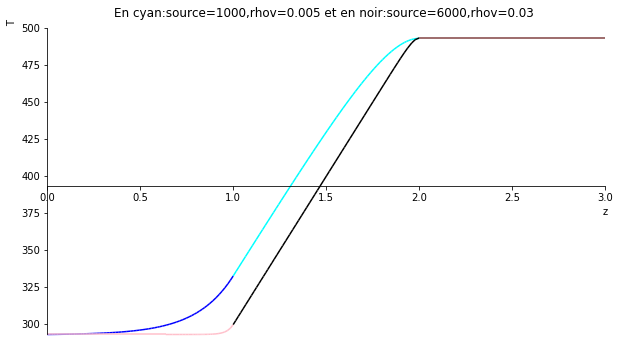

In [18]:
dico1={'rhov':.005,'c_p':1000,'z_1':1,'z_2':2,'k':1,'S':1000,'T_0':293}
T_1plot=T_1.subs(dico1)
T_2plot=T_2.subs(dico1)
T_3plot=T_3.subs(dico1)
dico2={'rhov':.03,'c_p':1000,'z_1':1,'z_2':2,'k':1,'S':6000,'T_0':293}
T_4plot=T_1.subs(dico2)
T_5plot=T_2.subs(dico2)
T_6plot=T_3.subs(dico2)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,6
V1=sp.Function('V1')(z)
V2=sp.Function('V2')(z)
p=sp.plot((T_1plot,(z,0,1)),(T_2plot,(z,1,2)),(T_3plot,(z,2,3)),
        (T_4plot,(z,0,1)),(T_5plot,(z,1,2)),(T_6plot,(z,2,3)),
        show=False,ylabel='T',xlabel='z')
p[0].label='source=1000,rhov=0.005, section inerte'
p[1].label='reaction '
p[2].label='inerte'
p[3].label='source=6000,rhov=0.03, section inerte'
p[4].label='reaction'
p[5].label='inerte'
p[0].line_color='blue'
p[1].line_color='cyan'
p[2].line_color='red'
p[3].line_color='pink'
p[4].line_color='black'
p[5].line_color='gray'
p.title='En cyan:source=1000,rhov=0.005 et en noir:source=6000,rhov=0.03 '
p.legend=False
p.show()